In [4]:
import pandas as pd

data = pd.read_csv('data/inputs/fredmd_transf.csv')

In [5]:
from learning.functions import run_memory, compute_transition_matrix

# fix dates
data["date"] = pd.to_datetime(data["date"])
data = data.set_index("date")

# compute moving average
data = data.rolling(window=12).mean()

# drop missing values
data = data.dropna()

memory = run_memory(data=data,
                    fix_start=True,
                    estimation_window=12 * 4,
                    similarity_method="cosine",
                    k_opt_method="elbow",
                    clustering_method="kmeans")

Building memory using window: 295: 100%|██████████| 296/296 [00:25<00:00, 11.80it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

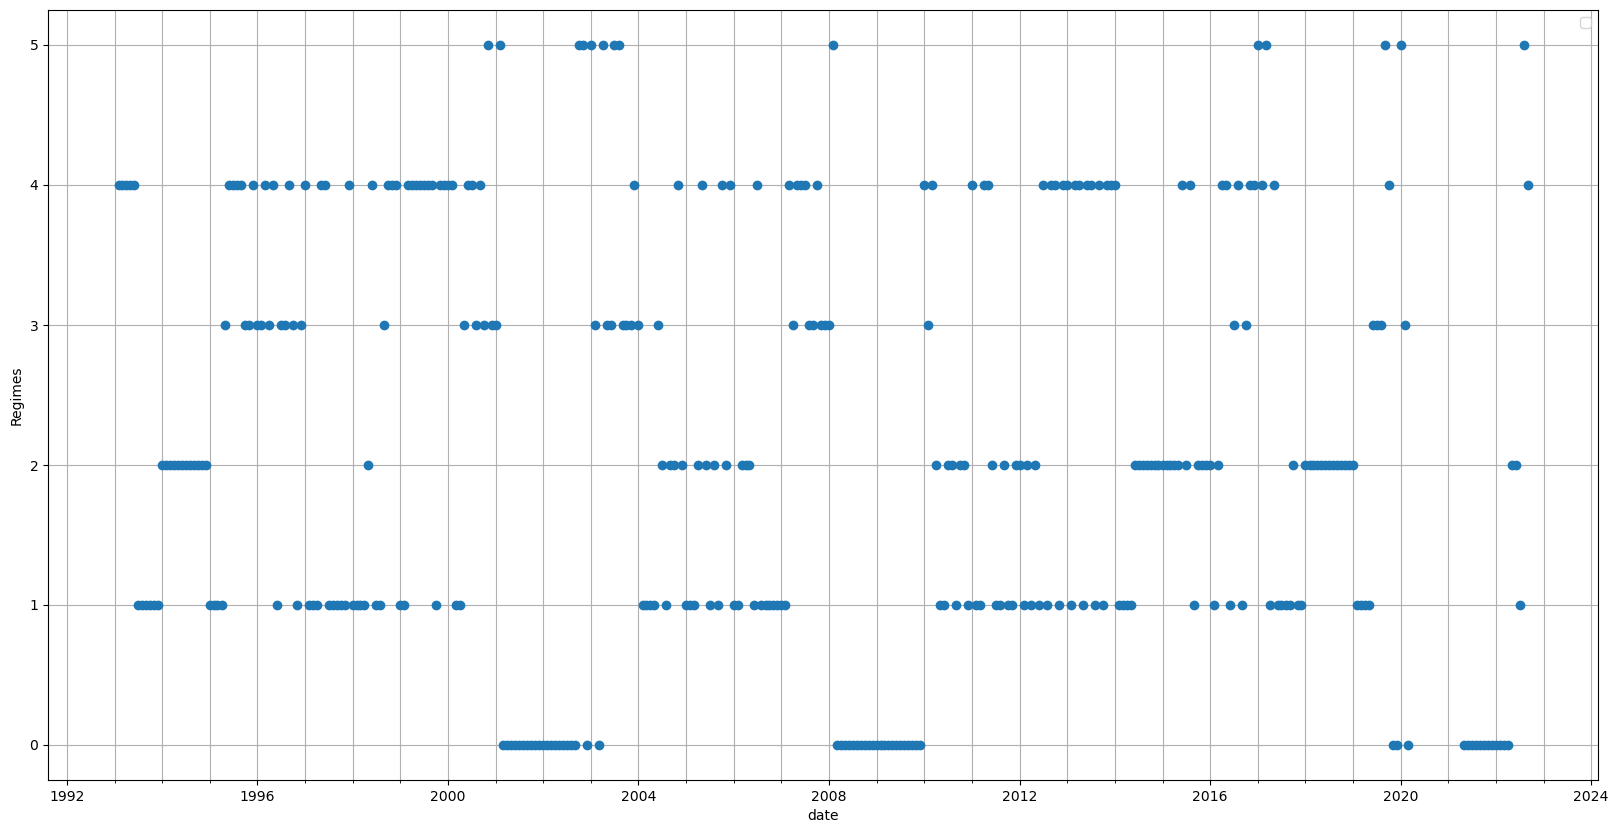

In [7]:
final_clusters = memory['cluster_step295']
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
plt.figure(figsize=(20, 10))
plt.plot(final_clusters.index, final_clusters.values, marker="o", linestyle="")
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.YearLocator())
plt.xlabel("date")
plt.ylabel("Regimes")
plt.grid(which="both")
plt.legend()

In [9]:
raw_data = pd.read_csv('data/inputs/fredmd_transf.csv')
raw_data["date"] = pd.to_datetime(raw_data["date"])
raw_data = raw_data.set_index("date")
raw_data = raw_data.dropna()

major_cols = ['RPI', 'UNRATE', 'UMCSENTx', 'FEDFUNDS', 'CPIAUCSL', 'S&P 500']

final_clusters = memory['cluster_step295']
for i in range(6):
    cur_cluster = final_clusters[final_clusters == i]
    fred_data = raw_data.loc[cur_cluster.index]
    print(f"Cluster {i} Statistics:")
    # get average of each column
    cur_list = []
    for col in major_cols:
        print(f"    {col}: {fred_data[col].mean()}")
        cur_list.append(fred_data[col].mean())
    print(cur_list)

Cluster 0 Statistics:
    RPI: -0.0004838905676136767
    UNRATE: 0.050574712643678146
    UMCSENTx: -0.6966954022988505
    FEDFUNDS: -0.16035919540229882
    CPIAUCSL: 0.002280253767771929
    S&P 500: -0.009132483478366265
[-0.0004838905676136767, 0.050574712643678146, -0.6966954022988505, -0.16035919540229882, 0.002280253767771929, -0.009132483478366265]
Cluster 1 Statistics:
    RPI: 0.002795057521700668
    UNRATE: -0.04777777777777777
    UMCSENTx: 0.17768518518518536
    FEDFUNDS: 0.04084259259259258
    CPIAUCSL: 0.001938817112171874
    S&P 500: 0.011227671274424577
[0.002795057521700668, -0.04777777777777777, 0.17768518518518536, 0.04084259259259258, 0.001938817112171874, 0.011227671274424577]
Cluster 2 Statistics:
    RPI: 0.002728615241431574
    UNRATE: -0.058454106280193235
    UMCSENTx: 0.23128019323671503
    FEDFUNDS: 0.05451690821256037
    CPIAUCSL: 0.0018746889124337267
    S&P 500: 0.006733558196990648
[0.002728615241431574, -0.058454106280193235, 0.23128019323671

In [10]:
transition_test = compute_transition_matrix(memory)

In [11]:
print(transition_test[-1])

[[0.89655172 0.         0.01724138 0.         0.01724138 0.06896552]
 [0.         0.51111111 0.18888889 0.1        0.18888889 0.01111111]
 [0.         0.26086957 0.63768116 0.         0.10144928 0.        ]
 [0.05405405 0.05405405 0.02702703 0.32432432 0.40540541 0.13513514]
 [0.01351351 0.31081081 0.08108108 0.14864865 0.41891892 0.02702703]
 [0.21428571 0.07142857 0.         0.35714286 0.21428571 0.14285714]]


<Figure size 640x480 with 0 Axes>

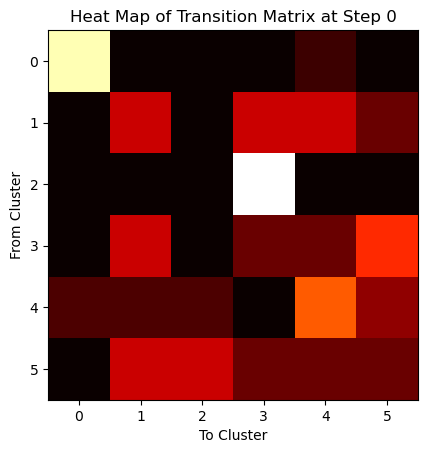

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.clf()
fig, ax = plt.subplots()
im = ax.imshow(transition_test[0], cmap='hot', interpolation='nearest')
def update(frame):
    im.set_data(transition_test[frame])
    ax.set_title(f'Heat Map of Transition Matrix at Step {frame}')
    ax.set_xlabel('To Cluster')
    ax.set_ylabel('From Cluster')
    return im
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(transition_test), interval=1)
ani.save(filename="cluster_evolution.gif", writer="pillow")